In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [5]:
credits = pd.read_excel('credit-cards.xls', header=1)
credits.drop(columns=['ID'], inplace=True)  # Remove ID column
credits.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6                     30000 non-null int64
PAY_AMT1                

In [7]:
credits.isna().count()

LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_0                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

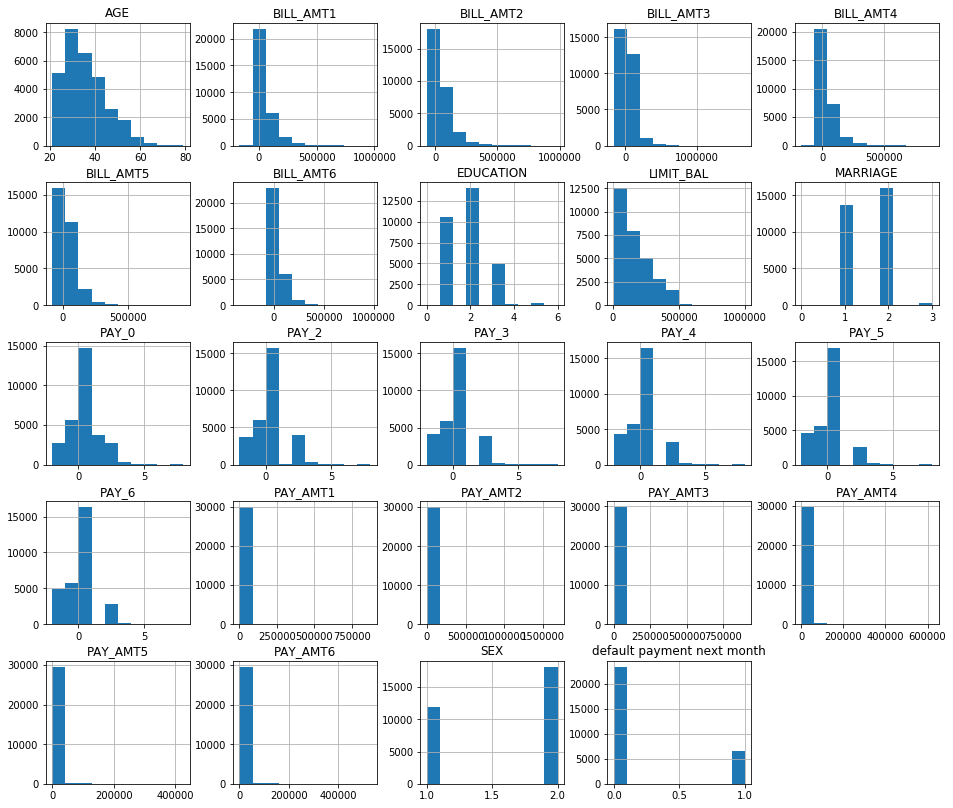

In [8]:
credits.hist(figsize=(16,14));

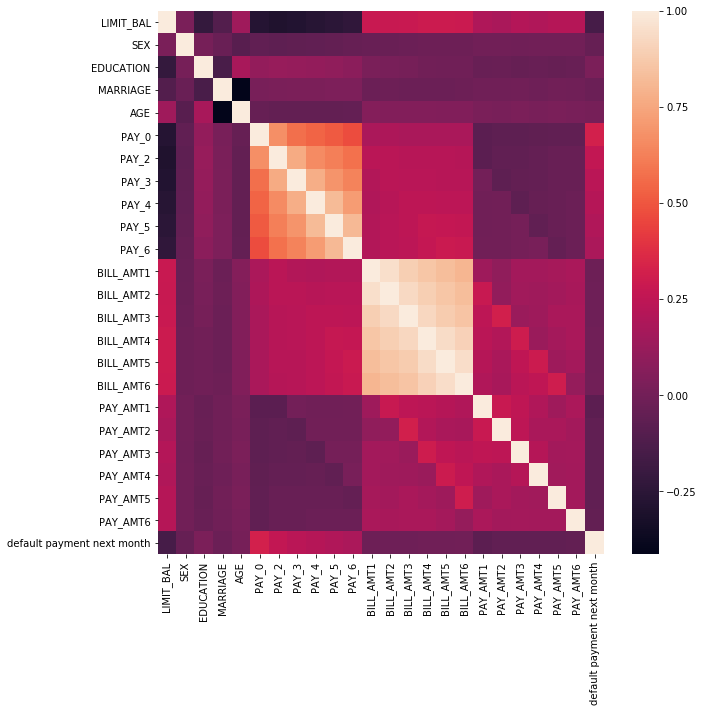

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(credits.corr())

Notes : Bill amounts and Payment Duty looks highly correlated

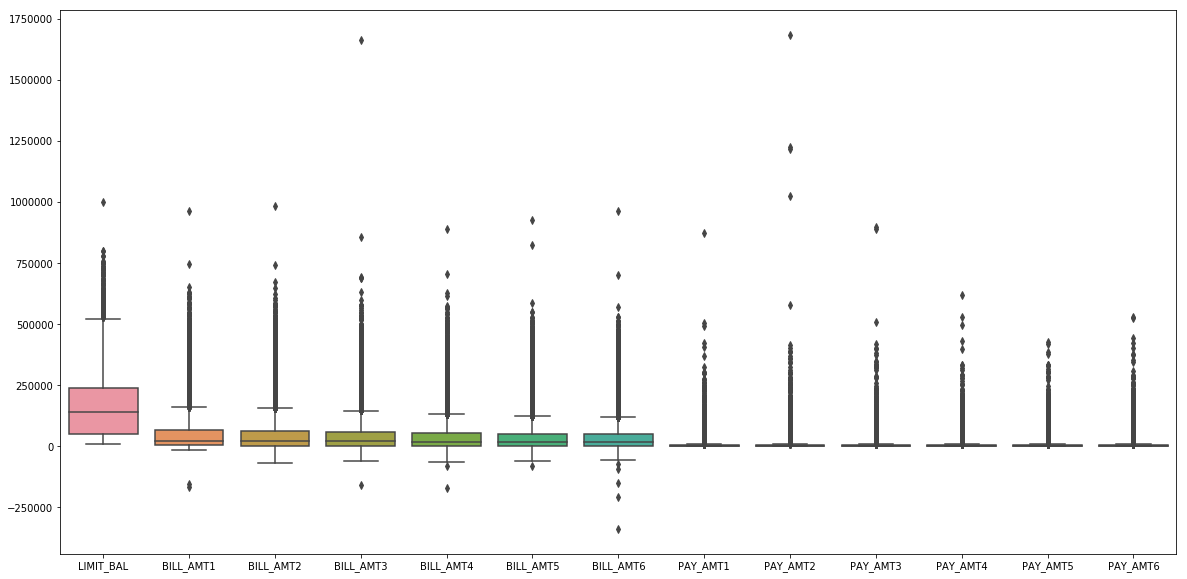

In [10]:
numerical_features = [
    'LIMIT_BAL',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]
plt.figure(figsize=(20,10))
sns.boxplot(data=credits[numerical_features])
# credits.PAY_AMT1.dist()

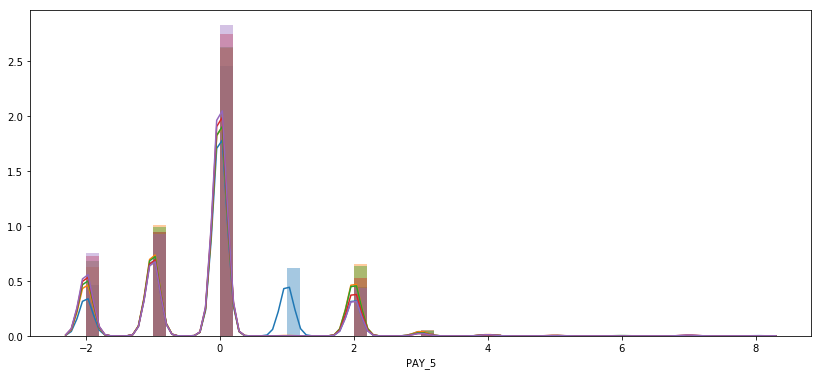

In [11]:
plt.figure(figsize=(14,6))
sns.distplot(a=credits['PAY_0'])
sns.distplot(a=credits['PAY_2'])
sns.distplot(a=credits['PAY_3'])
sns.distplot(a=credits['PAY_4'])
sns.distplot(a=credits['PAY_5'])

In [12]:
# Preprocessing data
from sklearn.preprocessing import StandardScaler

X = credits.iloc[:, :-1]
y = credits.iloc[:,-1]

X.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [13]:
# Transform categorical features
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
cat_features = pd.get_dummies(X[categorical_cols], columns=categorical_cols, drop_first=True)
cat_features.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,1,0,1,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0
2,1,0,1,0,0,0,0,0,1,0
3,1,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,1,0,0


In [14]:
# Scale numerical features
numerical_cols = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]
scaler = StandardScaler()
num_features = scaler.fit_transform(X[numerical_cols])
num_features = pd.DataFrame(num_features, columns=numerical_cols)

In [15]:
scaled_df = pd.concat([cat_features, num_features], axis=1)
scaled_df.head()

,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,...,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,0,1,0,0,0,0,1,0,0,...,-0.696663,-0.666599,-1.530046,-1.486041,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,1,0,1,0,0,0,0,0,1,0,...,0.138865,0.188746,0.234917,1.992316,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,1,0,1,0,0,0,0,0,1,0,...,0.138865,0.188746,0.234917,0.253137,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,1,0,1,0,0,0,0,1,0,0,...,0.138865,0.188746,0.234917,0.253137,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,0,0,1,0,0,0,0,1,0,0,...,-0.696663,0.188746,0.234917,0.253137,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create baseline model
dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(estimator=dt_clf, X=scaled_df, y=y, cv=5)
dt_mean_cv_score = dt_cv_score.mean()

print("Mean Cross Validation Score: {:.4}%".format(dt_mean_cv_score * 100))

Mean Cross Validation Score: 72.37%


In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create baseline model
rf_clf = RandomForestClassifier()
rf_cv_score = cross_val_score(estimator=rf_clf, X=scaled_df, y=y, cv=5)
rf_mean_cv_score = rf_cv_score.mean()

print("Mean Cross Validation Score: {:.4}%".format(rf_mean_cv_score * 100))

Mean Cross Validation Score: 80.62%


In [15]:
from sklearn.ensemble import AdaBoostClassifier

# Create baseline model
ada_clf = AdaBoostClassifier()
ada_cv_score = cross_val_score(estimator=ada_clf, X=scaled_df, y=y, cv=5)
ada_mean_cv_score = ada_cv_score.mean()

print("Mean Cross Validation Score: {:.4}%".format(ada_mean_cv_score * 100))

Mean Cross Validation Score: 81.63%


In [18]:
# Dealing with imbalance target
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score

0    16312
1     5382
dtype: int64
0    16312
1     5382
dtype: int64
Mean Cross Validation Score: 81.99%
Mean Cross Validation Score: 81.74%
Accuracy: 0.8174444444444444
Precision: 0.6499508357915438
Recall: 0.3393223819301848
0    16312
1     8156
dtype: int64
Mean Cross Validation Score: 81.81%
Mean Cross Validation Score: 81.8%
Accuracy: 0.818
Precision: 0.621283255086072
Recall: 0.4075975359342916
0    16312
1    11418
dtype: int64
Mean Cross Validation Score: 80.51%
Mean Cross Validation Score: 80.36%
Accuracy: 0.8035555555555556
Precision: 0.5545454545454546
Recall: 0.4697125256673511
1    16312
0    16312
dtype: int64
Mean Cross Validation Score: 77.93%
Mean Cross Validation Score: 77.54%
Accuracy: 0.7754444444444445
Precision: 0.483371298405467
Recall: 0.5446611909650924


<Figure size 720x576 with 0 Axes>

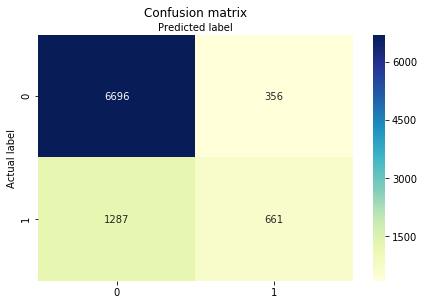

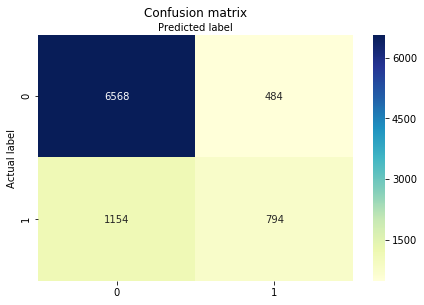

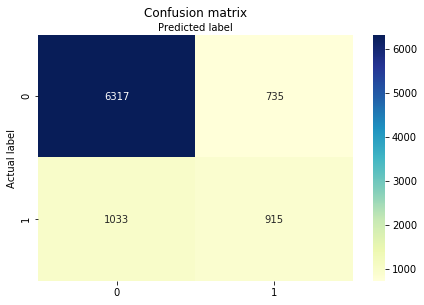

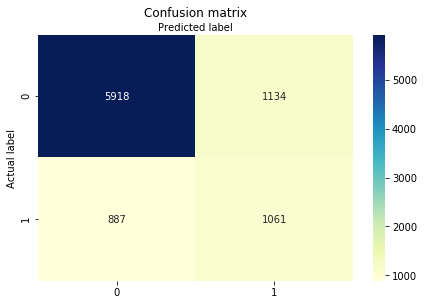

In [17]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=.3, random_state=123)

# print(y.value_counts()) #Previous original class distribution
#Fit a model
smote = SMOTE(sampling_strategy=.33)
X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
# smote = SMOTE()
# X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

# Now let's compare a few different ratios of minority class to majority class
ratios = [0.33, 0.5,0.7,1]
names = ['0.33','0.5','0.7','majority']
colors = sns.color_palette("Set2")

plt.figure(figsize=(10,8))

for n, ratio in enumerate(ratios):
    #Fit a model
    smote = SMOTE(sampling_strategy=ratio)
    X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train)
    print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

    # Create baseline model
    dt_clf = AdaBoostClassifier()
    dt_clf.fit(X_train_resampled, y_train_resampled)
#     dt_cv_score = cross_val_score(estimator=dt_clf, X=scaled_df, y=y, cv=5)
#     dt_mean_cv_score = dt_cv_score.mean()

#     print("Mean Cross Validation Score: {:.4}%".format(dt_mean_cv_score * 100))
#     logreg = LogisticRegression(fit_intercept = False, C = 1e12,solver ='lbfgs') #Starter code
#     model_log = logreg.fit(X_train_resampled, y_train_resampled)
#     print(model_log) #Preview model params

    #Predict
    y_hat_train = dt_clf.predict(X_train)
    y_hat_test = dt_clf.predict(X_test)
    
    print("Mean Cross Validation Score: {:.4}%".format(accuracy_score(y_train, y_hat_train) * 100))
    print("Mean Cross Validation Score: {:.4}%".format(accuracy_score(y_test, y_hat_test) * 100))
    
    cnf_matrix = confusion_matrix(y_test, y_hat_test)
    
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print("Accuracy:", accuracy_score(y_test, y_hat_test))
    print("Precision:", precision_score(y_test, y_hat_test))
    print("Recall:", recall_score(y_test, y_hat_test))

#     y_pred_proba = pid_log_reg.predict_proba(X_test)[::,1]
#     fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
#     auc = metrics.roc_auc_score(y_test, y_pred_proba)
#     plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
#     plt.legend(loc=4)
#     plt.show()

#     y_score = dt_clf.decision_function(X_test)

#     fpr, tpr, thresholds = roc_curve(y_test, y_score)
    
#     print('AUC for {}: {}'.format(names[n], auc(fpr, tpr)))
#     lw = 2
#     plt.plot(fpr, tpr, color=colors[n], lw=lw, label='ROC curve {}'.format(names[n]))

# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])

# plt.yticks([i/20.0 for i in range(21)])
# plt.xticks([i/20.0 for i in range(21)])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()

In [19]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = best_score = 0
    
    for k in range(min_k, max_k + 1, 2):
        knn_classifier = KNeighborsClassifier(n_neighbors=k)
        knn_classifier.fit(X_train, y_train)
        
        y_preds = knn_classifier.predict(X_test)
        k_f1_score = f1_score(y_test, y_preds)

        if k_f1_score > best_score:
            best_score = k_f1_score
            best_k = k
    
    best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
    best_knn_classifier.fit(X_train, y_train)

    y_preds = best_knn_classifier.predict(X_test)
    print_metrics(y_test, y_preds)
    print('Best Value for k:', best_k)
    print('F1-Score:', best_score)
    return None

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

test_preds = knn_classifier.predict(X_test)

find_best_k(X_train, y_train, X_test, y_test)

In [2]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [20]:
import xgboost as xgb

X_train, X_test, y_train, y_test = train_test_split(scaled_df, y, test_size=.3, random_state=123)

# Build baseline model and check performance
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train)
training_preds = xgb_clf.predict(X_train)
val_preds = xgb_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print_metrics(y_test, val_preds)
# print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
# print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Precision Score: 0.6561371841155235
Recall Score: 0.37320328542094455
Accuracy Score: 0.822
F1 Score: 0.4757853403141361
